In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# Select only the columns you need here; removed debtor information for this example as it's not needed
cols = [
    "loan_id",
    "status",
    "client_id",
    "debtor_country",
    "trust_id",
    "amount",
    "created_at",
    "accepted_at",
    "refused_at",
    "repaid_at",
    "due_date",
    "insurance_status"
]

# Load data stored on DB files folder, exported from Metabase without unneeded columns
# Figures weren't matching due to the fact numbers in france are not separated with , and the decimal value is not .
df = pd.read_csv('DB files/loans.csv',
                 decimal='.',
                 thousands=',')

# Create a list of the dates to ensure they're converted as dates
date_cols = ["accepted_at", "created_at", "refused_at", "repaid_at", "due_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Convert amount to int
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df.head()

C:\Users\Heber\AppData\Local\Temp\ipykernel_17860\1697290018.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


,loan_id,status,client_id,debtor_identifier,debtor_identifier_type,debtor_country,trust_id,amount,created_at,accepted_at,refused_at,repaid_at,due_date,insurance_status
0,ccba7b5961ac84c6bc09ba20b0497bd666ac10a7ecf123...,REPAID,2477304f4867e7ea86fd4414e0f845c0e4bd06516fe687...,17c277f8d264ccec868dc55add915dc93fd4ae4bd779cf...,siren,FR,e98a46aea01b6f55341744cdddbba3d6a88ab1e7d366eb...,13643.52,2025-01-24 09:52:00,2025-01-24 09:52:00,NaT,2025-03-06 05:05:00,2025-03-25 08:00:00,SETTLED
1,ea43f967166a7809d0e0f27fff33a3732fa600513d1b5f...,REPAID,a57af78c8caa2a9c6efbf8d9535f34441319c66ba56803...,494f60d81e3f8e6effbf093a1c2c6d0a99ca9d561bf624...,siren,FR,e98a46aea01b6f55341744cdddbba3d6a88ab1e7d366eb...,58.97,2025-08-27 07:51:00,2025-08-27 09:59:00,NaT,2025-09-30 10:30:00,2025-10-01 00:00:00,NaN
2,1d39f1f6c61cef090d31c552b0d3e511280ba64c2fb69a...,REPAID,dd3a54bd37885757d4c4b3dbd85c5fdcffa351fe2d1680...,8ab1efec5e005f628c0e5793276ddaf1e3693cf880a0a9...,cif,ES,e98a46aea01b6f55341744cdddbba3d6a88ab1e7d366eb...,6654.03,2025-02-24 09:13:00,2025-02-24 16:51:00,NaT,2025-06-03 18:32:00,2025-05-20 09:12:00,REFUSED
3,f03b65936792e9d35e66db0572aa43cdc5f2d33d75fcd0...,REPAID,dd3a54bd37885757d4c4b3dbd85c5fdcffa351fe2d1680...,8563f72a004fcba1d5ae23410ccf82a6d8bcc85fb6ccfd...,kvk,NL,c4ed1a68f3ad7b3c85c4400e688e4dd3dcfe4da53d171d...,4452.80,2025-10-07 06:19:00,2025-10-07 06:19:00,NaT,2025-10-29 15:34:00,2025-11-01 06:19:00,SETTLED
4,70290cf7ced390115c4443cab5f519fcf8ac52a11dafbd...,REPAID,dd3a54bd37885757d4c4b3dbd85c5fdcffa351fe2d1680...,17c277f8d264ccec868dc55add915dc93fd4ae4bd779cf...,siret,FR,e98a46aea01b6f55341744cdddbba3d6a88ab1e7d366eb...,966.08,2025-07-29 12:21:00,2025-07-29 12:21:00,NaT,2025-09-05 14:43:00,2025-09-22 12:21:00,SETTLED


In [176]:
print("\nData Types and Nulls:")
df.info()


Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68083 entries, 0 to 68082
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_id                 68083 non-null  object        
 1   status                  68083 non-null  object        
 2   client_id               68083 non-null  object        
 3   debtor_identifier       68083 non-null  object        
 4   debtor_identifier_type  68083 non-null  object        
 5   debtor_country          68083 non-null  object        
 6   trust_id                68083 non-null  object        
 7   amount                  68083 non-null  float64       
 8   created_at              68083 non-null  datetime64[ns]
 9   accepted_at             63878 non-null  datetime64[ns]
 10  refused_at              4205 non-null   datetime64[ns]
 11  repaid_at               62829 non-null  datetime64[ns]
 12  due_date               

In [177]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,amount,created_at,accepted_at,refused_at,repaid_at,due_date
count,68083.000000,68083,63878,4205,62829,68083
mean,4261.792493,2025-06-21 12:58:37.471909632,2025-06-22 02:26:05.339866624,2025-07-02 07:31:48.627824128,2025-08-15 06:24:11.267726848,2025-08-10 05:08:52.823759104
min,0.020000,2025-01-01 02:30:00,2025-01-01 02:31:00,2025-01-02 10:33:00,2025-01-08 05:02:00,2024-02-04 12:56:00
25%,54.990000,2025-04-22 07:06:00,2025-04-22 12:09:00,2025-05-05 10:13:00,2025-06-17 12:19:00,2025-06-20 00:00:00
50%,331.300000,2025-06-24 08:35:00,2025-06-24 08:51:30,2025-07-09 11:34:00,2025-08-18 13:28:00,2025-08-09 07:09:00
75%,6653.890000,2025-09-02 01:26:00,2025-09-02 09:37:45,2025-09-17 12:13:00,2025-10-16 14:33:00,2025-10-17 08:35:00
max,470512.850000,2025-10-31 20:49:00,2025-12-01 16:30:00,2025-12-23 17:19:00,2026-01-09 12:59:00,2026-01-22 06:50:00
std,7871.625344,NaN,NaN,NaN,NaN,NaN


In [178]:
print("\nMissing Values:")
df.isna().sum()


Missing Values:


loan_id                       0
status                        0
client_id                     0
debtor_identifier             0
debtor_identifier_type        0
debtor_country                0
trust_id                      0
amount                        0
created_at                    0
accepted_at                4205
refused_at                63878
repaid_at                  5254
due_date                      0
insurance_status          32596
dtype: int64

#### Key findings ###
Accepted at has null values, meaning not all loans are accepted
No null loan id, meaning data quality is apparently ok
No null client id, debtor id, trust id, meaning joins against target tables are possible
Filtering by Country, status, insurance status are possible

In [179]:
# create function for time filter
def filter_by_date(df, start=None, end=None, date_col="accepted_at"):
    if start:
        df = df[df[date_col] >= start]
    if end:
        df = df[df[date_col] <= end]
    return df

In [180]:
# Question 1 - Monthly Production
# List of invalid status
invalid_status = ['REFUSED','EXPIRED','REJECTED','TIME_BARRED']

# Create new df filtered by valid status above
q1_df = df[~df["insurance_status"].isin(invalid_status)].copy()


# Filtered df with date function above; CHANGE DATES HERE
q1_df = filter_by_date(
    q1_df,
    start="2025-01-01",
    end="2025-12-31",
    date_col="accepted_at"
)

# Convert date to a monthly period, ie 2025-01-16 is converted to 2025-01-01
q1_df["month"] = q1_df["accepted_at"].dt.to_period("M").dt.to_timestamp()

# Group by month and sum amount
monthly_production = (
    q1_df
    .groupby("month")["amount"]
    .sum()
    .reset_index(name="monthly_production")
)

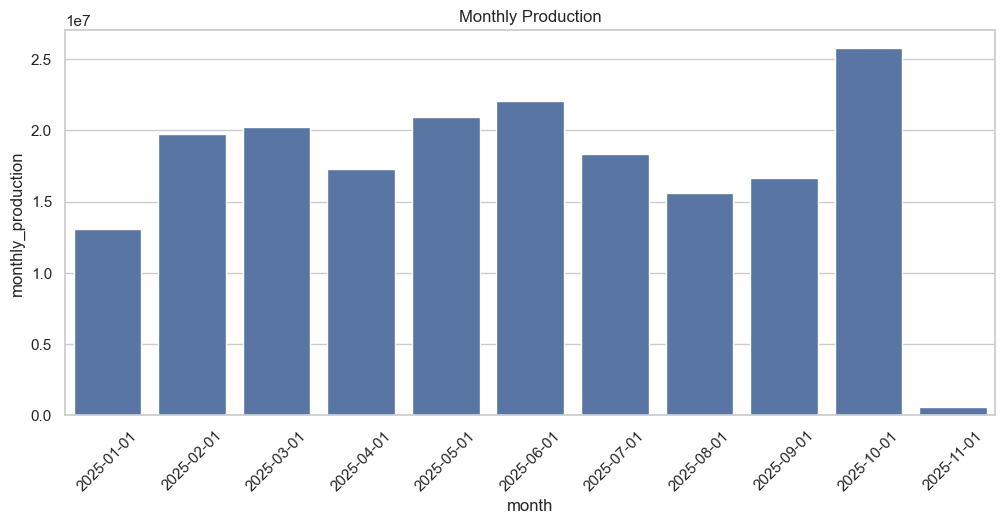

In [181]:
# Line chart for question 1
plt.figure(figsize=(12,5))
sns.barplot(
    data=monthly_production,
    x="month",
    y="monthly_production"
)
plt.title("Monthly Production")
plt.xticks(rotation=45)
plt.show()

In [182]:
# Question 2 - Average insurance rate per country per month
# List of valid insured status (WHERE insurance_status IN ('CLAIMED','SETTLED','ACTIVATED'))
insured_status = ['CLAIMED','SETTLED','ACTIVATED']

q2_df = df[df["insurance_status"].isin(insured_status)].copy()
q2_df["month"] = q2_df["accepted_at"].dt.to_period("M").dt.to_timestamp()

In [183]:
# Chart for question 2 assist
def plot_avg_insurance_rate(
    data,
    country=None,
    start_date=None,
    end_date=None,
    chart_type=None
):
    d = data.copy()

    # Filter by country
    if country:
        d = d[d["debtor_country"] == country]

    # Filter by date
    if start_date:
        d = d[d["month"] >= pd.to_datetime(start_date)]
    if end_date:
        d = d[d["month"] <= pd.to_datetime(end_date)]

    grouped = (
        d.groupby(["debtor_country", "month"])["amount"]
        .mean()
        .reset_index(name="avg_insurance_rate")
    )

    plt.figure(figsize=(12,5))

    if chart_type == "bar":
        sns.barplot(data=grouped, x="month", y="avg_insurance_rate")
    else:
        sns.lineplot(data=grouped, x="month", y="avg_insurance_rate")

    title = "Average Insurance Rate"
    if country:
        title += f" – {country}"

    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

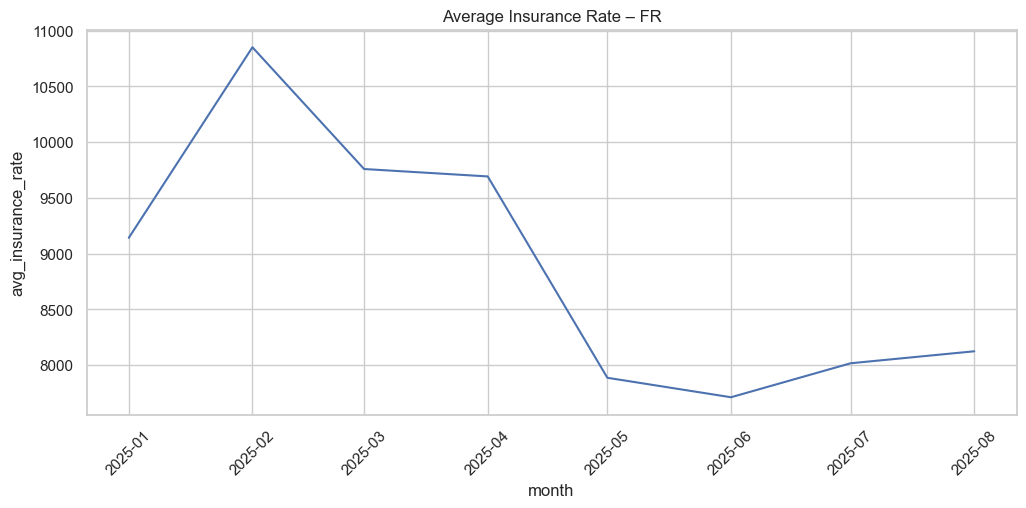

In [184]:
# Chart for question 2
# Country + timeframe, SELECT THE desired country and dates here
plot_avg_insurance_rate(
    q2_df,
    country="FR",
    start_date="2025-01-01",
    end_date="2025-08-31",
    chart_type="line"
)

In [185]:
# Question 3 - Metrics per trust
q3_df = df.copy()
q3_df["trust"] = q3_df["trust_id"].str[-5:]

summary = (
    q3_df
    .groupby("trust")
    .agg(
        total_outstanding=("amount", lambda x: x[q3_df.loc[x.index, "status"]  # Similar to the case when on SQL
                                                .isin(["PAST_DUE","TO_REPAY"])].sum()),
        avg_loan_size=("amount", "mean"),
        insurance_rate=("amount", lambda x: x[q3_df.loc[x.index, "insurance_status"] == "SETTLED"].mean()), #Similar to the case when
        pct_non_french=("debtor_country", lambda x: (x != "FR").mean() * 100) # x != FR is throwing out true (1) or false (0)
    )
    .reset_index()
)

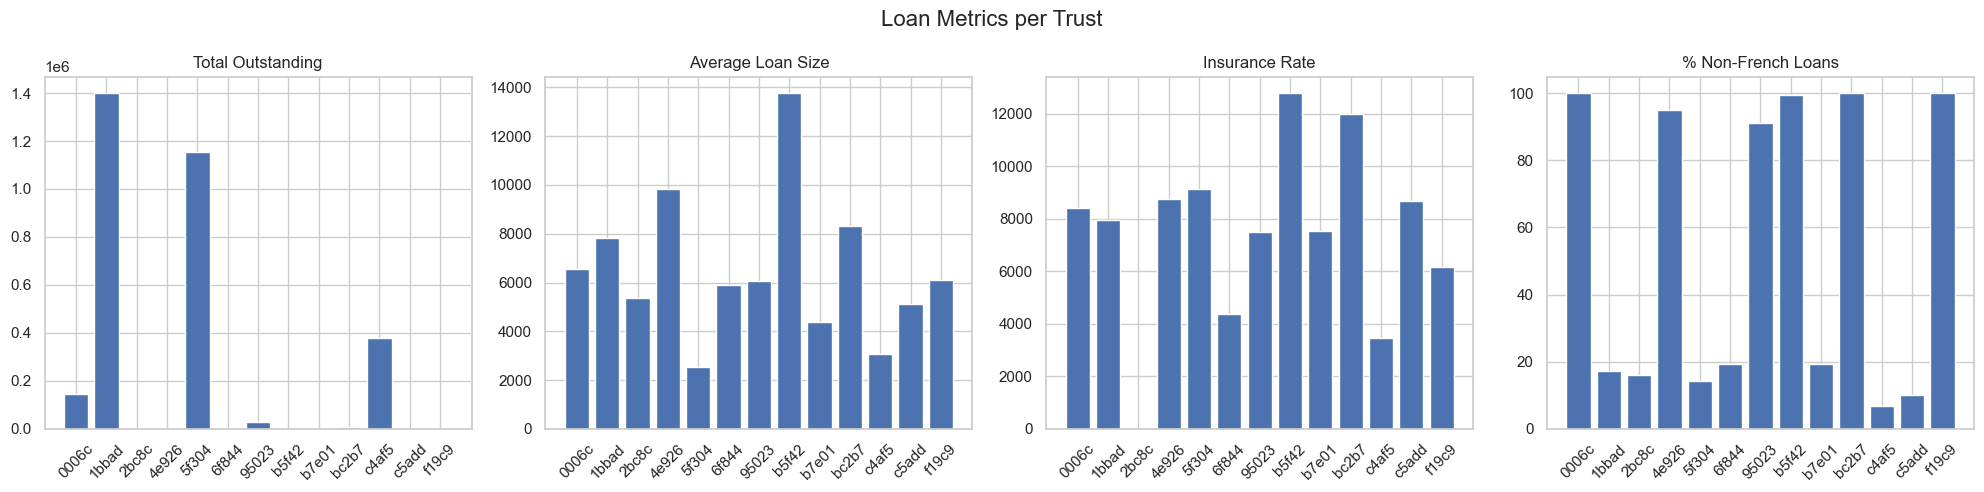

In [186]:
# Charts for question 3
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# 1. Total outstanding
axes[0].bar(summary["trust"], summary["total_outstanding"])
axes[0].set_title("Total Outstanding")
axes[0].tick_params(axis='x', rotation=45)

# 2. Average loan size
axes[1].bar(summary["trust"], summary["avg_loan_size"])
axes[1].set_title("Average Loan Size")
axes[1].tick_params(axis='x', rotation=45)

# 3. Insurance rate
axes[2].bar(summary["trust"], summary["insurance_rate"])
axes[2].set_title("Insurance Rate")
axes[2].tick_params(axis='x', rotation=45)

# 4. % non-French loans
axes[3].bar(summary["trust"], summary["pct_non_french"])
axes[3].set_title("% Non-French Loans")
axes[3].tick_params(axis='x', rotation=45)

plt.suptitle("Loan Metrics per Trust", fontsize=16)
plt.tight_layout()
plt.show()